# Problem Statement
- The Advertising dataset caption sales revenue generate with respect to advertisement spends across multiple channels like radio, tv, and newspaper.

#  Objectives 
<font size = 4> Build a linear regression model to:<br>
 - Interpret the coefficients of the model.
 - Make prediction.
 - Find and analyze model residuals.
 - Evaluate model effiency using RMSE and R-Suquare value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Units of TV,RADIO,NEWSPAPER are given in thousand doller and sales is given in million dollar
df = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\Advertising.csv", index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# EDA

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.shape

(200, 4)

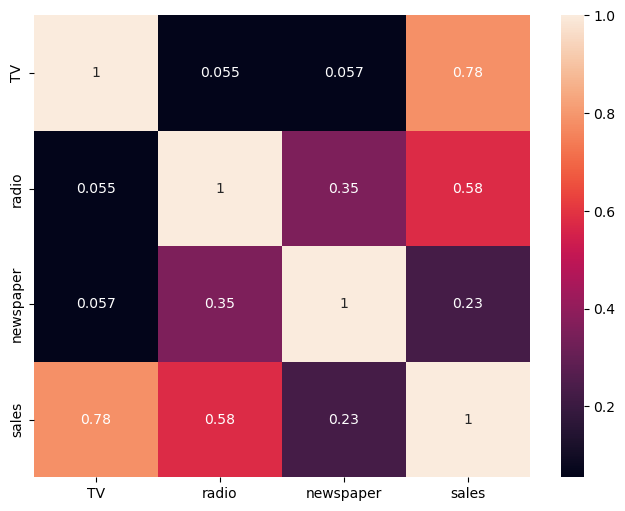

In [5]:
correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True)
plt.show()

In [6]:
 df.isna().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

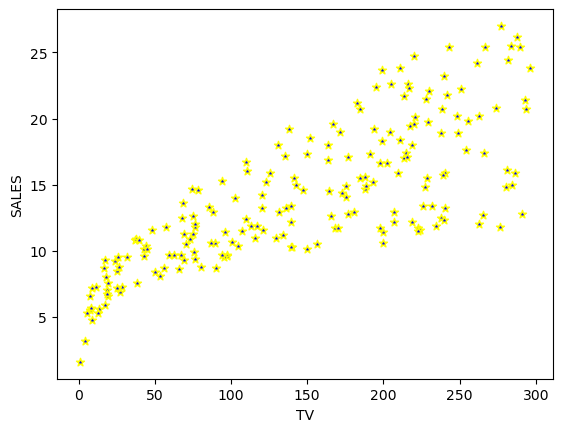

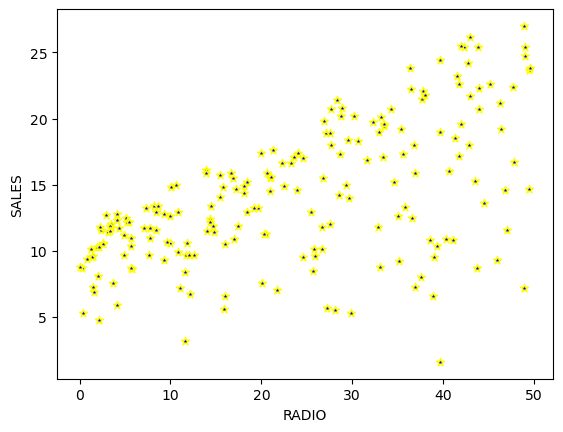

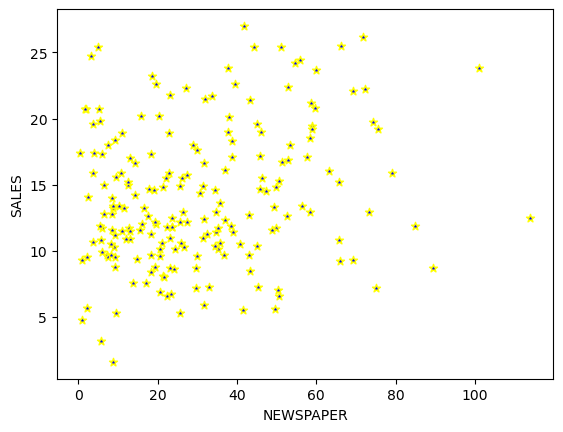

In [7]:
plt.scatter(df['TV'],df['sales'],color = 'blue',edgecolors = "yellow",marker = '*' ,alpha = 1)
plt.xlabel('TV')
plt.ylabel('SALES')
plt.show()

plt.scatter(df['radio'],df['sales'],color = 'blue',edgecolors = "yellow",marker = '*' ,alpha = 1)
plt.xlabel('RADIO')
plt.ylabel('SALES')
plt.show()

plt.scatter(df['newspaper'],df['sales'],color = 'blue',edgecolors = "yellow",marker = '*' ,alpha = 1)
plt.xlabel('NEWSPAPER')
plt.ylabel('SALES')
plt.show()

# Simple liner Regression

Since we are performing simple liner regression only one feature has been for prediction.

In [8]:
feature_cols = ['TV'] # since we are doing simple linear regression, I have taken only one feature 
x = df[feature_cols]
y = df.sales

# Train Test Split

We are splitting the dataset in 70-30 ratio for train-test set.

In [9]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (140, 1)
Shape of y_train is (140,)
Shape of x_test is (60, 1)
Shape of y_test is (60,)


# Fitting the model to our trainig data

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Checking the intercept and coeffiecient

In [11]:
print(f" The intercept is {lm.intercept_}")  # Give the intercept
print(f" The coffiecient is {lm.coef_}")  # Give the coefficient 

 The intercept is 7.23945983075114
 The coffiecient is [0.0464078]


# Prediction for train and test dataset

In [12]:
preds_train = lm.predict(x_train)
preds_test = lm.predict(x_test)

preds_train

array([20.43319798, 15.82026244, 12.47890069,  8.34396552, 20.73020791,
        8.13977119, 20.86479054,  8.10728573, 13.47202766,  8.42749957,
       11.89880316, 10.96136556, 15.98268975, 15.45364081, 13.07292056,
       16.96653516, 13.87113475, 15.82026244, 17.56055502, 18.45622561,
        8.03767403, 12.83159999, 11.40223968, 16.10799082, 10.74324889,
       16.2054472 , 11.21660847, 19.62570222,  9.07256801, 19.36581853,
        7.85204282, 16.2286511 , 20.99473238, 19.56537208, 17.20321495,
       14.18670781, 13.35136737,  9.90790845, 18.38197312, 13.79688227,
       15.62999046, 11.7502982 , 17.4723802 , 13.75047447, 19.09201249,
       11.7038904 , 10.30701555, 18.34484688, 15.39331066, 18.38197312,
        8.07015949, 17.9178951 , 20.40071251, 15.18911634, 16.47925323,
       12.95226027, 13.32352269,  8.40429566, 14.82713548, 18.785721  ,
       16.63703976,  7.84740204,  7.42973182, 11.59715245, 19.44007101,
       17.83436106, 19.01776001, 18.52583731, 18.36805078, 17.82

# Assesing model performance through various metrics

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print(f" RMSE for train data is :{np.sqrt(mean_squared_error(y_train,preds_train))}")
print(f" R2 for train data is : {r2_score(y_train,preds_train)}")
print(f" RMSE for test data is :{np.sqrt(mean_squared_error(y_test,preds_test))}")
print(f" R2 for test data is : {r2_score(y_test,preds_test)}")


 RMSE for train data is :3.3450117024237263
 R2 for train data is : 0.5736021199591975
 RMSE for test data is :2.995161304907236
 R2 for test data is : 0.6714477229302764


Text(0, 0.5, 'SALES')

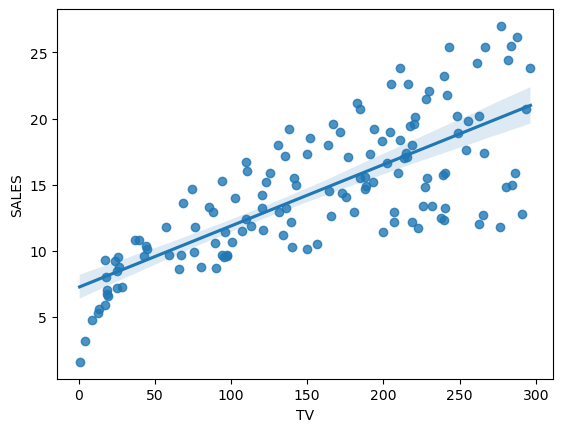

In [14]:
sns.regplot(x = np.reshape(x_train,newshape = (140,)), y = np.reshape(y_train, newshape = (140,)))
plt.xlabel("TV")
plt.ylabel("SALES")

# Simple Linear Regression using statsmodels

In [15]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)  # This is giving the intercept
model = sm.OLS(y_train,x_train).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     185.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.55e-27
Time:                        18:03:25   Log-Likelihood:                -367.70
No. Observations:                 140   AIC:                             739.4
Df Residuals:                     138   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.604     11.986      0.0

# Interpratation
- The P-value value 0.000 is less the 0.05.
- The regression model suggests that tv advertising spending has a positive impact on sales, with each additional dollar spent on TV advertising contributing to an estimated increase in sales. However, keep in mind that correlation does not imply causation.


# Multiple Linear Regression



In [17]:
# Using multiple linear regression

In [18]:
feature_cols = ["TV","radio","newspaper"]
x = df[feature_cols]
y = df.sales

# train-test split

In [19]:
from sklearn import model_selection as ms
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

# Standardizing the dataset

In [20]:
from sklearn.preprocessing import StandardScaler # fit vs transform vs fit_transform
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[ 1.53003874e+00, -8.86292904e-01, -1.16598019e+00],
       [ 3.41038651e-01, -1.73144262e-01, -4.09601321e-01],
       [-5.20208901e-01, -4.20003407e-01,  3.95263370e-01],
       [-1.58600275e+00,  7.93720724e-01,  1.71892638e+00],
       [ 1.60659408e+00, -1.33201081e+00, -1.06415995e+00],
       [-1.63863454e+00, -5.16004186e-01, -3.95055573e-01],
       [ 1.64128322e+00,  2.86288037e-01, -1.38901498e+00],
       [-1.64700778e+00, -7.83434927e-01, -3.41721166e-01],
       [-2.64226989e-01, -1.27715322e+00, -1.02537129e+00],
       [-1.56447156e+00,  1.06115147e+00, -1.02537129e+00],
       [-6.69731045e-01, -9.54864889e-01, -1.30174050e+00],
       [-9.11358830e-01, -1.61315594e+00, -1.03021988e+00],
       [ 3.82904851e-01, -3.72003018e-01, -2.35052352e-01],
       [ 2.46540656e-01,  6.77148350e-01,  4.00111952e-01],
       [-3.67098225e-01,  9.17150297e-01,  2.36378785e+00],
       [ 6.36494408e-01, -2.00573056e-01, -9.57491140e-01],
       [-1.61355754e-01,  3.96003212e-01

# Training the model

In [22]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Checking the intercept and coeffiecient

In [23]:
print(f" The intercept is {lm.intercept_}")  # Give the intercept
print(f" The coffiecient is {lm.coef_}")  # Give the coefficient 

 The intercept is 14.497142857142858
 The coffiecient is [3.68334078 2.90625242 0.14194772]


# Prediction

In [24]:
preds_train = lm.predict(x_train)
preds_test = lm.predict(x_test)

preds_train

array([17.39149783, 15.19196153, 11.41650701, 11.20610472, 16.39256165,
        6.90577778, 21.17740606,  6.10528574,  9.66662607, 11.67308587,
        9.0704377 ,  6.30582199, 14.7930121 , 17.42999512, 16.14599956,
       16.12273906, 14.9308629 , 19.61593142, 13.70741553, 21.09067507,
       13.09101877, 13.79551693,  8.87971636, 16.97348947,  8.22902448,
       15.34026923, 13.95862675, 23.23157581, 12.67992504, 23.10768546,
        6.80057243, 18.81832259, 23.69669553, 18.39890879, 16.97890645,
       16.44055305, 12.41657918, 11.94072527, 16.7732918 , 14.5933997 ,
       13.22910727,  7.49691601, 19.30121038,  9.33105452, 19.3603766 ,
       10.16463427,  6.94369039, 16.52918217, 13.53571009, 14.80225851,
       11.13948107, 20.85632272, 24.02985438, 18.427486  , 17.84570024,
       15.11333638, 17.21352856,  9.2345359 , 17.29735156, 19.22919752,
       16.29255016,  3.54203145,  5.24055709, 15.86268553, 15.12384811,
       16.31596188, 18.34249185, 23.4941462 , 14.34540589, 20.48

# Assessing model performance through various metrics.

In [25]:
from sklearn.metrics import r2_score,mean_squared_error
print(f" RMSE for train data is :{np.sqrt(mean_squared_error(y_train,preds_train))}")
print(f" R2 for train data is : {r2_score(y_train,preds_train)}")
print(f" RMSE for test data is :{np.sqrt(mean_squared_error(y_test,preds_test))}")
print(f" R2 for test data is : {r2_score(y_test,preds_test)}")

 RMSE for train data is :1.574596830590544
 R2 for train data is : 0.9055159502227753
 RMSE for test data is :1.9485372043446398
 R2 for test data is : 0.8609466508230366


In [32]:
import statsmodels.api as sm
strain = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              5.103
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                     0.00223
Time:                        18:10:25   Log-Likelihood:                         -573.83
No. Observations:                 140   AIC:                                      1154.
Df Residuals:                     137   BIC:                                      1162.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6833      1.249      2.950      0.004       1.214       6.152
x2             2.9063      1.328      2.189      0.030       0.281       5.532
x3             0.1419      1.326      0.107      0.915      -2.480       2.763
==============================================================================
Omnibus:                       68.437   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.342
Skew:                          -1.709   Prob(JB):                     2.25e-71
Kurtosis:                       9.640   Cond. No.                         1.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""